In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
# % matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

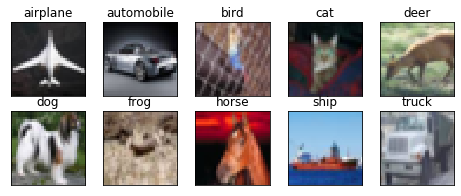

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [11]:



# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """





Epoch 1/50





390/390 [==============================] - 23s 59ms/step - loss: 1.8721 - acc: 0.2761 - val_loss: 1.4198 - val_acc: 0.4710
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3461 - acc: 0.5100 - val_loss: 1.1519 - val_acc: 0.5843
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1030 - acc: 0.6095 - val_loss: 0.9154 - val_acc: 0.6794
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9455 - acc: 0.6707 - val_loss: 0.8912 - val_acc: 0.7000
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8625 - acc: 0.7029 - val_loss: 0.7615 - val_acc: 0.7369
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7909 - acc: 0.7303 - val_loss: 0.7276 - val_acc: 0.7538
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7386 - acc: 0.7468 - val_loss: 0.6675 - val_acc: 0.7704
Epoch 8/50
390/390 [==============================] - 

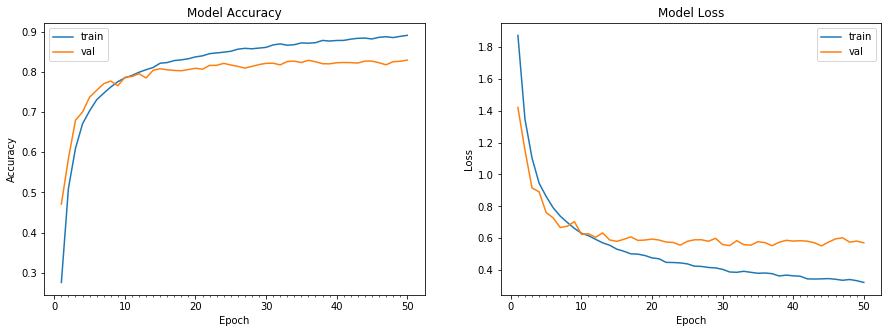

Accuracy on test data is: 82.90


In [14]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [17]:
# Define the model

# (Output size, receptive field) mentioned in tuple form after adding each layer as comment.

my_model = Sequential()
my_model.add(SeparableConv2D(48, 3, 3, activation='relu', input_shape=(32, 32, 3))) # (30, 3)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(96, kernel_size = (3, 3), strides=(2, 2), activation='relu')) # (14, 5)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))


my_model.add(SeparableConv2D(48, 3, 3, activation='relu')) # (12, 7)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))

my_model.add(SeparableConv2D(96, 3, 3, activation='relu')) # (10, 11)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))

my_model.add(SeparableConv2D(96, 3, 3, activation='relu')) # (8, 15)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))


my_model.add(SeparableConv2D(96, kernel_size = (3, 3), strides=(2, 2), activation='relu')) # (3, 19)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))


my_model.add(SeparableConv2D(192, 3, 3, activation='relu')) # (1, 23)
my_model.add(BatchNormalization())
my_model.add(Dropout(0.15))


my_model.add(SeparableConv2D(num_classes, 1, 1, activation='relu')) # (1, 23)
my_model.add(BatchNormalization())



my_model.add(Flatten())
my_model.add(Activation('softmax')) #(1, 23)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=2, min_lr=0.1e-6)

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `SeparableConv2D` call

In [19]:
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_17 (Separab (None, 30, 30, 48)        219       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_18 (Separab (None, 14, 14, 96)        5136      
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 96)        384       
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 96)        0         
_________________________________________________________________
separable_conv2d_19 (Separab (None, 12, 12, 48)       

In [20]:
# train the model
start = time.time()
# Train the model
my_model_info = my_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                     callbacks=[lr_reducer],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("My model took %0.2f seconds to train"%(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


Epoch 1/50
390/390 [==============================] - 28s 72ms/step - loss: 1.8847 - acc: 0.3144 - val_loss: 1.5882 - val_acc: 0.4298
Epoch 2/50
390/390 [==============================] - 25s 63ms/step - loss: 1.5068 - acc: 0.4642 - val_loss: 1.4530 - val_acc: 0.4886
Epoch 3/50
390/390 [==============================] - 24s 63ms/step - loss: 1.3351 - acc: 0.5319 - val_loss: 1.2336 - val_acc: 0.5635
Epoch 4/50
390/390 [==============================] - 24s 63ms/step - loss: 1.2216 - acc: 0.5738 - val_loss: 1.1130 - val_acc: 0.6117
Epoch 5/50
390/390 [==============================] - 24s 63ms/step - loss: 1.1319 - acc: 0.6043 - val_loss: 1.0615 - val_acc: 0.6311
Epoch 6/50
390/390 [==============================] - 24s 62ms/step - loss: 1.0733 - acc: 0.6257 - val_loss: 1.0139 - val_acc: 0.6489
Epoch 7/50
390/390 [==============================] - 24s 63ms/step - loss: 1.0228 - acc: 0.6433 - val_loss: 0.9801 - val_acc: 0.6567
Epoch 8/50
390/390 [==============================] - 24s 63ms

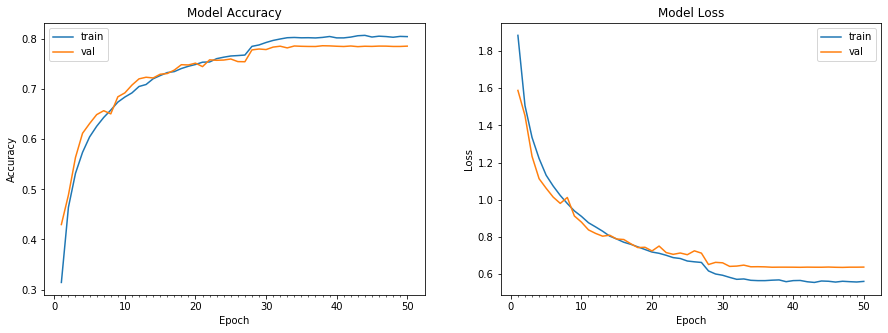

Accuracy on test data is: 82.90


In [21]:
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))